You need to submit:

1 bar chart, 1 stacked bar chart, 1 pie chart, and 1 donut with Tableau or PowerBI (you can choose the tool)

1 bar chart, 1 stacked bar chart, 1 pie chart, and 1 donut with Python

1 bar chart, 1 stacked bar chart, 1 pie chart, and 1 donut with R

**Excercise in R**

In [5]:
# Import required packages
library(readxl)
library(ggplot2)
library(dplyr)
library(pastecs)

obama <- read_excel(path = 'data/obama-approval-ratings.xls')

# Examine data
obama

Issue,Approve,Disapprove,None
<chr>,<dbl>,<dbl>,<dbl>
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6
Situation in Iraq,41,53,6
Taxes,41,54,5
Healthcare Policy,40,57,3


**Bar chart**

Looks like we can plot the issue in *x-axis* and any of the corresponding ratings in the *y-axis*. I am chosing the approval ratings as the measure

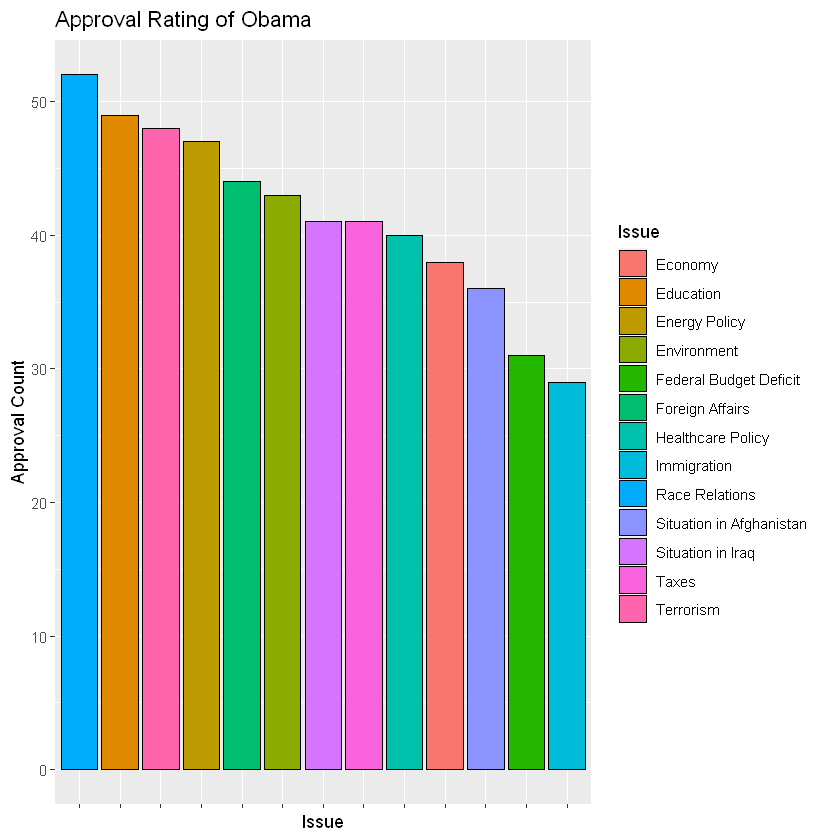

In [6]:
obama %>%
    dplyr::select(Issue, Approve) %>%
    dplyr::arrange(-Approve) %>%
    dplyr::mutate(SortOrder = factor(Issue, Issue)) %>% 
    ggplot2::ggplot(ggplot2::aes(x=SortOrder, y=Approve, fill=Issue)) +
        ggplot2::geom_bar(stat='identity', color='black') + 
        ggplot2::xlab('Issue') + ggplot2::ylab('Approval Count') +
        ggplot2::theme(axis.text.x=element_blank()) +
        ggplot2::ggtitle('Approval Rating of Obama') 

**Stacked Bar Chart**

For this, I will plot each issue with their respective Approval, Disapproval and Neutral counts. This will generate a 100% stacked bar chart for each issue, so that the reactions are rightfully captured.

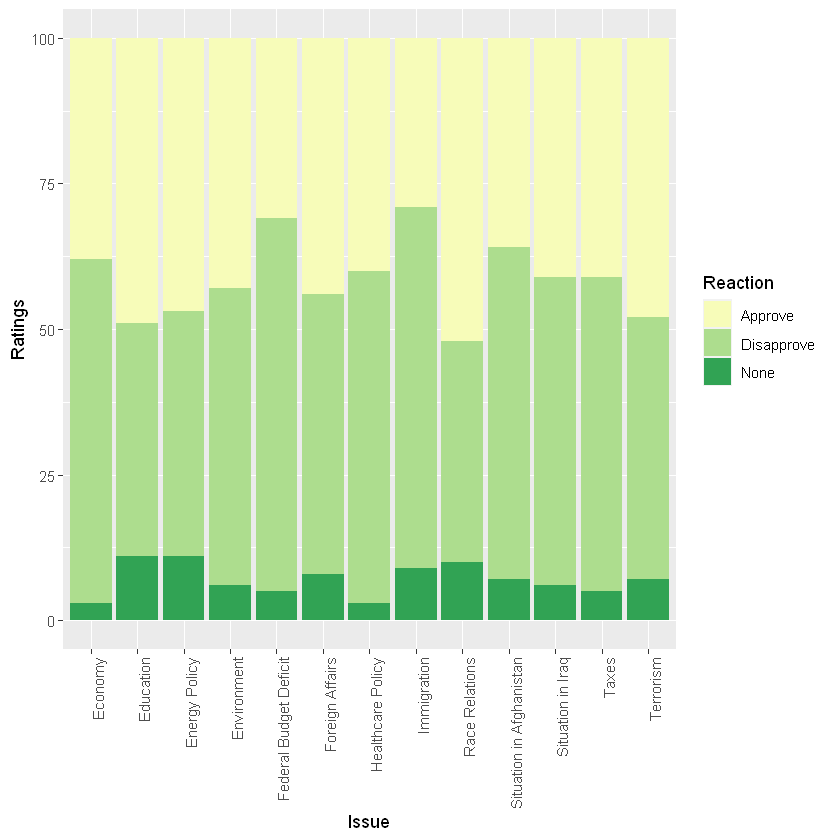

In [7]:
# We need to reshape the data to long format for this purpose
obama_long = obama %>%
    tidyr::gather('Reaction','Ratings', Approve, Disapprove, None)

# Plot stacked
ggplot2::ggplot(data = obama_long, ggplot2::aes(x = Issue, y = Ratings, fill = Reaction)) + 
    ggplot2:: geom_bar(stat='identity') + 
    ggplot2::theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
    ggplot2::scale_fill_brewer(palette = 15)

**Pie Chart**

For pie chart demonstration, I would like to pick the Immigration issue and plot the different ratings in a pie.

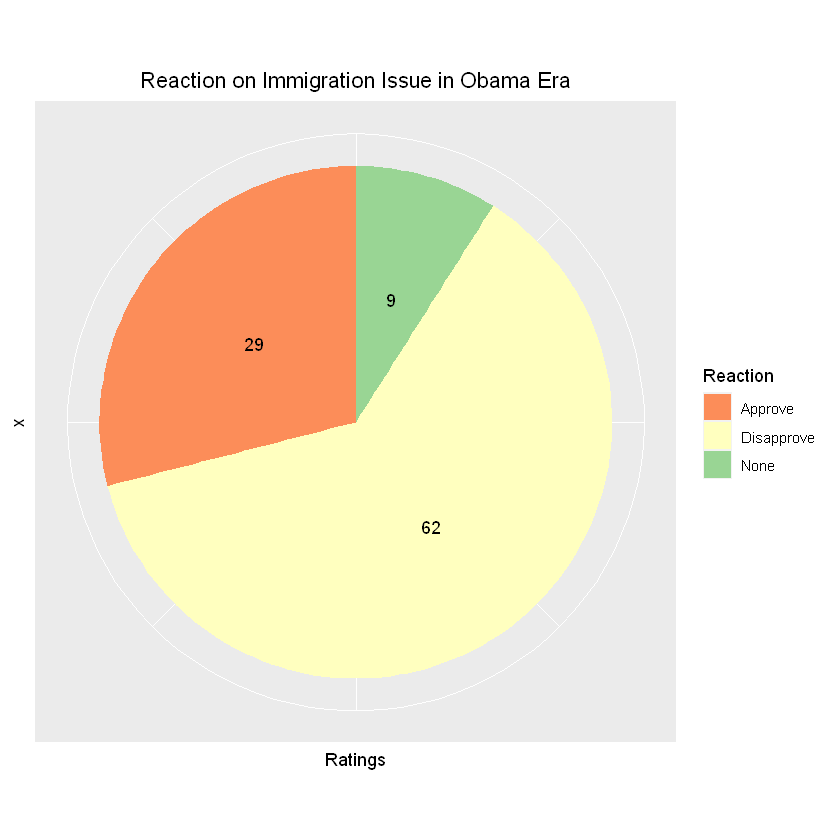

In [8]:
# For this purpose, I would need the long data set. Because we need the stacked chart before creating pie chart from it
# Since pie chart is not easy to digest, I would NOT use the same color family for the different sections
obama_long %>%
    dplyr::filter(Issue=='Immigration') %>%
    ggplot2::ggplot(ggplot2::aes(x="", y=Ratings, fill=Reaction))+
        ggplot2::geom_bar(width = 1, stat = 'identity') +
        ggplot2::coord_polar('y', start=0) + 
        ggplot2::geom_text(aes(label = Ratings), position = position_stack(vjust = 0.5)) +
        ggplot2::ggtitle(label = 'Reaction on Immigration Issue in Obama Era') +
        ggplot2::scale_fill_brewer(palette='Spectral') + 
        ggplot2::theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          plot.title = element_text(hjust = 0.5))

**Donut Chart**

For donut chart demonstration, I would like to pick the Education issue and plot the different ratings in the shape of a ring/donut.

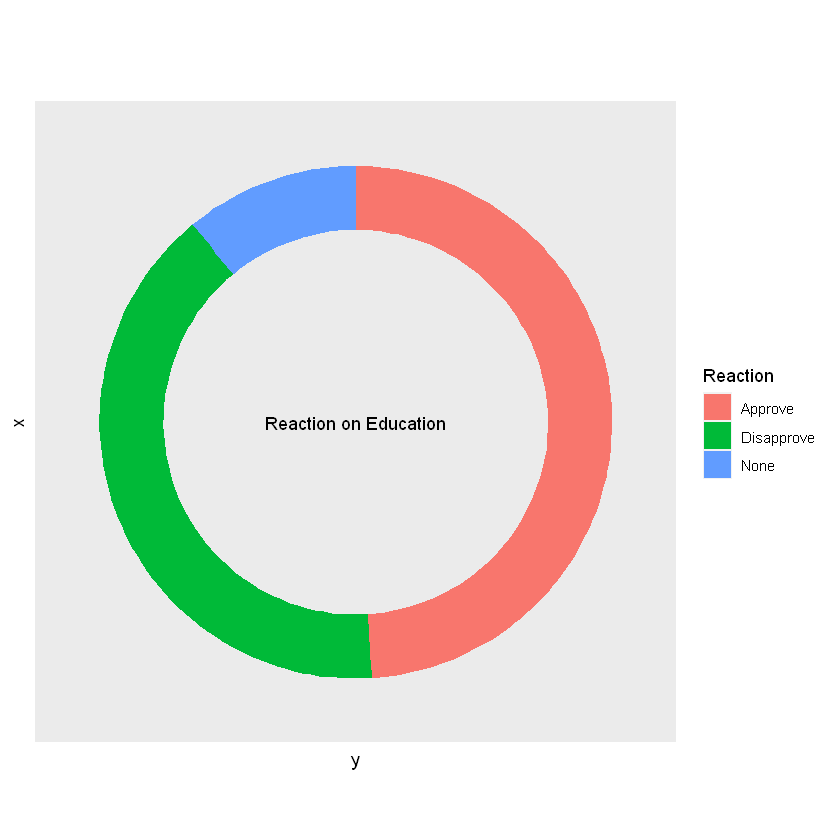

In [9]:
obama_long %>%
    dplyr::filter(Issue=='Education') %>%
    dplyr::mutate(ymax=cumsum(Ratings),
                  ymin=c(0,ymax[1:length(ymax)-1])) %>%
    ggplot2::ggplot(ggplot2::aes(fill=Reaction, ymax=ymax, ymin=ymin, xmax=4, xmin=3)) +
         ggplot2::geom_rect() +
         ggplot2::coord_polar(theta='y') +
         ggplot2::xlim(c(0, 4)) +
         ggplot2::theme(panel.grid=element_blank()) +
         ggplot2::theme(axis.text=element_blank()) +
         ggplot2::theme(axis.ticks=element_blank()) +
         ggplot2::annotate('text', x = 0, y = 0, label = 'Reaction on Education') +
         ggplot2::labs(title='')